In [93]:
import random
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
primer = 'ATT'
bp_dic = {
    'G':'C',
    'C':'G',
    'A':'T',
    'T':'A'
}

template = 'GTAAGCTGCATA'

In [106]:
# find sequence of complementary strand
complementary = ''
for bp in template:
    complementary = complementary + bp_dic[bp]
    
# find the first bp index to synthesize after primer annealing
idx = complementary.index(primer) + len(primer)

# elongate the strand from the primer, there is a 1/6 chance of a ddNTP (*) being incorporated, terminating the sequence
def elongate(primer, complementary, idx):
    sequence = primer
    for bp in complementary[idx:]:
        sequence = sequence + bp
        roll = random.random()
        if roll < (1/6):
            sequence = sequence + '*'
            return sequence
    return sequence
          
        
    

In [110]:
elongate(primer, complementary, idx)

'ATTC*'

In [111]:
# Now lets do this 100 times

seq_list=[]
for i in range(100):
    seq_list.append(elongate(primer, complementary, idx))

In [112]:
seq_list

['ATTCGAC*',
 'ATTCGA*',
 'ATTCGAC*',
 'ATTC*',
 'ATTC*',
 'ATTCG*',
 'ATTCGA*',
 'ATTC*',
 'ATTCGACGTA*',
 'ATTC*',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGAC*',
 'ATTCGACGTAT*',
 'ATTCGA*',
 'ATTCGA*',
 'ATTCGACGTAT',
 'ATTCG*',
 'ATTCGA*',
 'ATTCGACGT*',
 'ATTCGA*',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGAC*',
 'ATTCG*',
 'ATTCG*',
 'ATTCGACG*',
 'ATTCGACGTAT',
 'ATTCGA*',
 'ATTCGACGTAT',
 'ATTCGACGT*',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGT*',
 'ATTCGACGTAT',
 'ATTCGACGTA*',
 'ATTCGACGTAT',
 'ATTCGAC*',
 'ATTC*',
 'ATTCGA*',
 'ATTC*',
 'ATTCGACGT*',
 'ATTCGACGTA*',
 'ATTCGACGTAT',
 'ATTCGACGTA*',
 'ATTCGA*',
 'ATTCGAC*',
 'ATTCGA*',
 'ATTCGACGTAT',
 'ATTCG*',
 'ATTCGAC*',
 'ATTCGACGTAT',
 'ATTC*',
 'ATTC*',
 'ATTCGACGTAT',
 'ATTC*',
 'ATTCGACGTAT',
 'ATTCGACG*',
 'ATTC*',
 'ATTCG*',
 'ATTCGACGT*',
 'ATTCG*',
 'ATTCG*',
 'ATTCGACGT*',
 'ATTC*',
 'ATTCGACG*',
 'ATTCGACGTAT',
 'ATTC*',
 'ATTCG*',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGAC*',
 'ATTCGACGTAT',
 'ATTCGA

In [116]:
# sort the results 
sorted_list = sorted(seq_list, key=len)[::-1]
sorted_list

['ATTCGACGTAT*',
 'ATTCGACGTA*',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTA*',
 'ATTCGACGTAT',
 'ATTCGACGTA*',
 'ATTCGACGTAT',
 'ATTCGACGTA*',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTAT',
 'ATTCGACGTA*',
 'ATTCGACGT*',
 'ATTCGACGT*',
 'ATTCGACGT*',
 'ATTCGACGT*',
 'ATTCGACGT*',
 'ATTCGACGT*',
 'ATTCGACGT*',
 'ATTCGACGT*',
 'ATTCGACGT*',
 'ATTCGACG*',
 'ATTCGACG*',
 'ATTCGACG*',
 'ATTCGACG*',
 'ATTCGACG*',
 'ATTCGACG*',
 'ATTCGAC*',
 'ATTCGAC*',
 'ATTCGAC*',
 'ATTCGAC*',
 'ATTCGAC*',
 'ATTCGAC*',
 'ATTCGAC*',
 'ATTCGAC*',
 'ATTCGAC*',
 'ATTCGAC*',
 'ATTCGA*',
 'ATTCGA*',
 'ATTCGA*',
 'ATTCGA*',
 'ATTCGA*',
 'ATTCGA*',
 '

In [114]:
Counter(sorted_list)

Counter({'ATTCGACGTAT*': 1,
         'ATTCGACGTA*': 5,
         'ATTCGACGTAT': 30,
         'ATTCGACGT*': 9,
         'ATTCGACG*': 6,
         'ATTCGAC*': 10,
         'ATTCGA*': 11,
         'ATTCG*': 12,
         'ATTC*': 16})

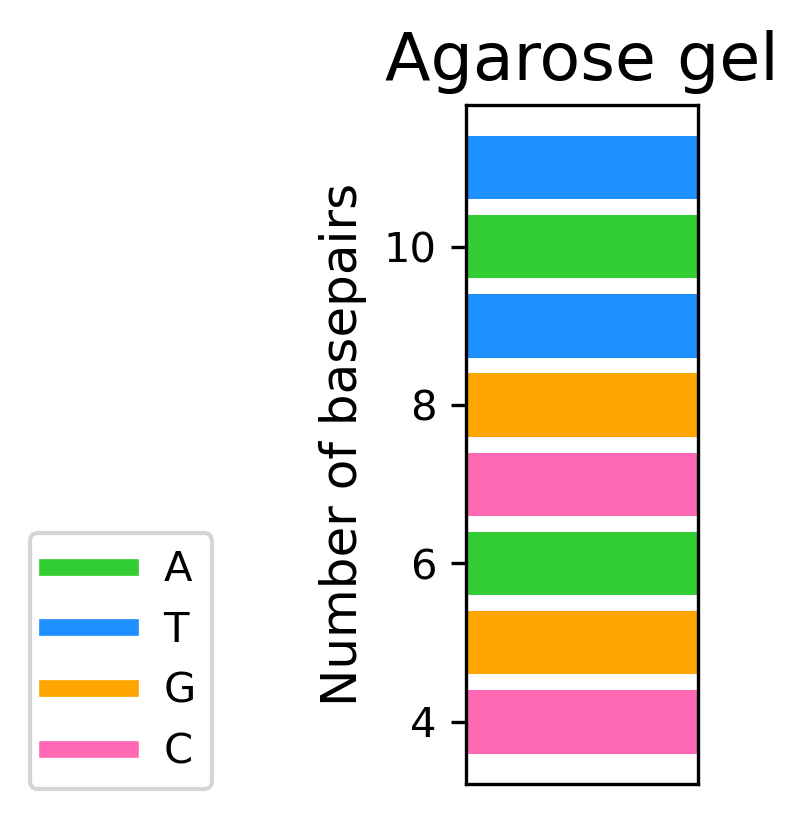

In [115]:
# Now we can simulate the result from our agarose gel
results = Counter(sorted_list)

lengths = []
density = []
colors = []

color_dic ={
    'A':'limegreen',
    'T':'dodgerblue',
    'G':'orange',
    'C':'hotpink'
}

fig = plt.gcf()
fig.set_size_inches(1, 3)
fig.set_dpi(300)

for i in results:
    if '*' in i:
        length = len(i)-1
        density= results[i]
        color = color_dic[i[-2]]
        plt.barh(length,1.0,color=color, alpha=1.0)

plt.title('Agarose gel', fontsize=16)
plt.ylabel('Number of basepairs', fontsize=12)
plt.xticks([])
plt.xlim(0,1)
custom_lines = [Line2D([0], [0], color='limegreen', lw=4),
                Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='hotpink', lw=4)]


plt.legend(custom_lines, ['A', 'T', 'G', 'C'], loc='upper right', bbox_to_anchor=(-1, 0.4))
plt.show()